In [13]:
import pandas as pd
from pathlib import Path

# Get current working directory
cwd = Path.cwd()

# Set path to data/output folder
dp = cwd.parent / 'output'

# Read in the data
df = pd.read_csv(dp / 'joined_data.csv')

In [15]:
# Print the first and last 5 rows of the data
df

,Country Name,Country Code,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,SP.DYN.LE00.IN,SP.POP.TOTL
0,Afghanistan,AFG,31.9,97.699997,18.51,0.159824,64.833,38041757.0
1,Albania,ALB,80.7,100.000000,40.20,1.692248,78.573,2854191.0
2,Algeria,DZA,99.7,99.500000,0.16,3.977650,76.880,43053054.0
3,Angola,AGO,49.5,45.642799,54.69,0.792137,61.147,31825299.0
4,Antigua and Barbuda,ATG,100.0,100.000000,0.91,5.354476,77.016,97115.0
...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",VEN,97.0,99.976814,15.62,3.939566,72.064,28515829.0
175,Vietnam,VNM,64.4,99.400002,18.65,3.488313,75.400,96462108.0
176,"Yemen, Rep.",YEM,61.3,72.751076,3.11,0.380633,66.125,29161922.0
177,Zambia,ZMB,11.2,43.000000,84.50,0.380717,63.886,17861034.0


In [16]:
df.describe()

,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,SP.DYN.LE00.IN,SP.POP.TOTL
count,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,66.137989,83.996223,32.192346,4.060132,72.379013,4.254753e+07
std,38.165389,25.607291,27.796557,4.781098,7.516462,1.511458e+08
min,0.000000,6.707007,0.000000,0.036986,53.283000,9.711500e+04
25%,30.200000,71.575539,10.275000,0.778696,67.123000,2.579749e+06
50%,85.700000,99.699997,24.700000,2.535628,73.507000,1.002428e+07
75%,100.000000,100.000000,50.310000,5.332896,77.678427,3.112158e+07
max,100.000000,100.000000,96.240000,32.474469,84.356341,1.407745e+09


In [17]:
df.sort_values(by='EN.ATM.CO2E.PC', ascending=False).head(10)

,Country Name,Country Code,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,SP.DYN.LE00.IN,SP.POP.TOTL
129,Qatar,QAT,100.0,100.0,0.04,32.474469,80.227000,2832071.0
87,Kuwait,KWT,100.0,100.0,0.06,22.022416,75.489000,4207077.0
11,Bahrain,BHR,100.0,100.0,0.00,20.266103,77.292000,1641164.0
168,United Arab Emirates,ARE,100.0,100.0,0.67,19.329563,77.972000,9770526.0
23,Brunei Darussalam,BRN,100.0,100.0,0.01,16.132159,75.860000,433296.0
29,Canada,CAN,100.0,100.0,22.11,15.430613,82.048780,37601230.0
94,Luxembourg,LUX,100.0,100.0,16.45,15.306427,82.639024,620001.0
135,Saudi Arabia,SAU,100.0,100.0,0.03,15.284579,75.133000,34268529.0
120,Oman,OMN,100.0,100.0,0.00,15.282436,77.861000,4974992.0
7,Australia,AUS,100.0,100.0,10.13,15.238267,82.900000,25365745.0


In [18]:
df.corr(numeric_only=True).style.background_gradient(cmap='RdBu_r', axis=None)

,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,SP.DYN.LE00.IN,SP.POP.TOTL
EG.CFT.ACCS.ZS,1.000000,0.826309,-0.704059,0.566110,0.805553,0.017395
EG.ELC.ACCS.ZS,0.826309,1.000000,-0.702143,0.457090,0.798837,0.066418
EG.FEC.RNEW.ZS,-0.704059,-0.702143,1.000000,-0.537340,-0.587881,-0.032986
EN.ATM.CO2E.PC,0.566110,0.457090,-0.537340,1.000000,0.521379,0.022030
SP.DYN.LE00.IN,0.805553,0.798837,-0.587881,0.521379,1.000000,0.012658
SP.POP.TOTL,0.017395,0.066418,-0.032986,0.022030,0.012658,1.000000


In [19]:
from sklearn.cluster import KMeans

In [20]:
# create kmeans object to categorize the population data
model = KMeans(n_clusters=5, random_state=42).fit(df['SP.POP.TOTL'].values.reshape(-1, 1))
df['POP.CAT'] = model.labels_

c:\Users\chief\.conda\envs\geoprj\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
df

,Country Name,Country Code,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,SP.DYN.LE00.IN,SP.POP.TOTL,POP.CAT
0,Afghanistan,AFG,31.9,97.699997,18.51,0.159824,64.833,38041757.0,3
1,Albania,ALB,80.7,100.000000,40.20,1.692248,78.573,2854191.0,0
2,Algeria,DZA,99.7,99.500000,0.16,3.977650,76.880,43053054.0,3
3,Angola,AGO,49.5,45.642799,54.69,0.792137,61.147,31825299.0,3
4,Antigua and Barbuda,ATG,100.0,100.000000,0.91,5.354476,77.016,97115.0,0
...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",VEN,97.0,99.976814,15.62,3.939566,72.064,28515829.0,3
175,Vietnam,VNM,64.4,99.400002,18.65,3.488313,75.400,96462108.0,2
176,"Yemen, Rep.",YEM,61.3,72.751076,3.11,0.380633,66.125,29161922.0,3
177,Zambia,ZMB,11.2,43.000000,84.50,0.380717,63.886,17861034.0,0


In [22]:
ordered_clusters = df['SP.POP.TOTL'].groupby(df['POP.CAT']).mean().sort_values()

In [23]:
ordered_clusters

POP.CAT
0    6.563437e+06
3    4.126422e+07
2    1.095778e+08
4    2.455068e+08
1    1.387081e+09
Name: SP.POP.TOTL, dtype: float64

In [24]:
cats = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

In [25]:
count = 0
for k, v in ordered_clusters.items():
    ordered_clusters[k] = cats[count]
    count += 1

In [26]:
ordered_clusters

POP.CAT
0     Very Low
3          Low
2       Medium
4         High
1    Very High
Name: SP.POP.TOTL, dtype: object

In [27]:
for k, v in ordered_clusters.items():
    df['POP.CAT'] = df['POP.CAT'].replace(k, v)

In [28]:
df

,Country Name,Country Code,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,SP.DYN.LE00.IN,SP.POP.TOTL,POP.CAT
0,Afghanistan,AFG,31.9,97.699997,18.51,0.159824,64.833,38041757.0,Low
1,Albania,ALB,80.7,100.000000,40.20,1.692248,78.573,2854191.0,Very Low
2,Algeria,DZA,99.7,99.500000,0.16,3.977650,76.880,43053054.0,Low
3,Angola,AGO,49.5,45.642799,54.69,0.792137,61.147,31825299.0,Low
4,Antigua and Barbuda,ATG,100.0,100.000000,0.91,5.354476,77.016,97115.0,Very Low
...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",VEN,97.0,99.976814,15.62,3.939566,72.064,28515829.0,Low
175,Vietnam,VNM,64.4,99.400002,18.65,3.488313,75.400,96462108.0,Medium
176,"Yemen, Rep.",YEM,61.3,72.751076,3.11,0.380633,66.125,29161922.0,Low
177,Zambia,ZMB,11.2,43.000000,84.50,0.380717,63.886,17861034.0,Very Low


In [29]:
import matplotlib.pyplot as plt

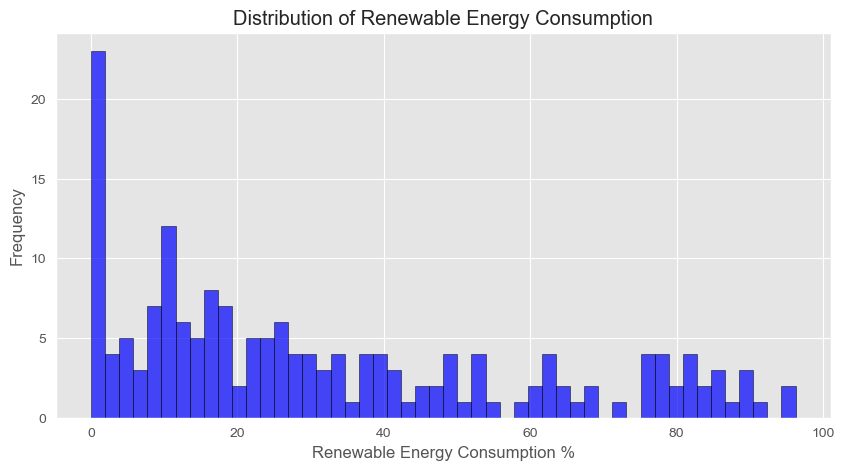

In [30]:
# Set the style
plt.style.use('ggplot')

# Set the figure size
plt.rcParams['figure.figsize'] = [10, 5]

# Plot the data
plt.hist(df['EG.FEC.RNEW.ZS'], bins=50, color='blue', edgecolor='black', alpha=0.7)

# Set the title
plt.title('Distribution of Renewable Energy Consumption')

# Set the x-axis label
plt.xlabel('Renewable Energy Consumption %')

# Set the y-axis label
plt.ylabel('Frequency')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


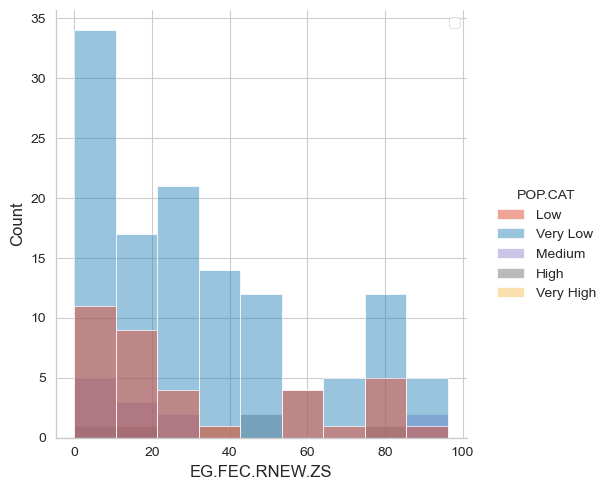

In [31]:
import seaborn as sns

# Set the style
sns.set_style('whitegrid')

# Set the figure size
plt.rcParams['figure.figsize'] = [10, 5]

# Plot the data
sns.displot(data=df, x='EG.FEC.RNEW.ZS', hue='POP.CAT', alpha=0.5)

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(loc='upper right')

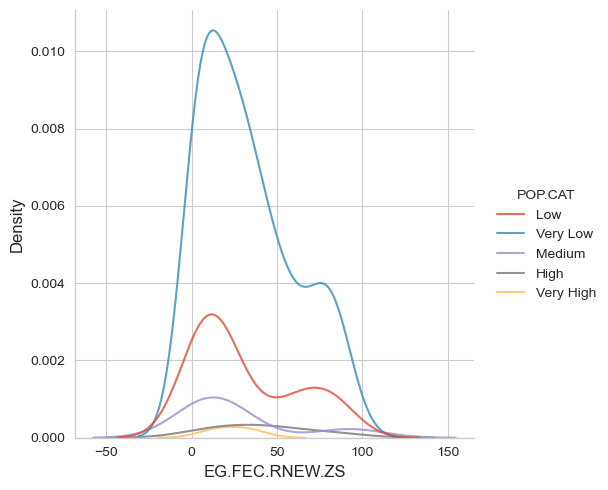

In [20]:
# Plot the data
sns.displot(data=df, kind='kde', x='EG.FEC.RNEW.ZS', hue='POP.CAT', alpha=0.8)

In [24]:
df.columns[2:]

Index(['EG.CFT.ACCS.ZS', 'EG.ELC.ACCS.ZS', 'EG.FEC.RNEW.ZS', 'EN.ATM.CO2E.PC',
       'SP.DYN.LE00.IN', 'SP.POP.TOTL', 'POP.CAT'],
      dtype='object')

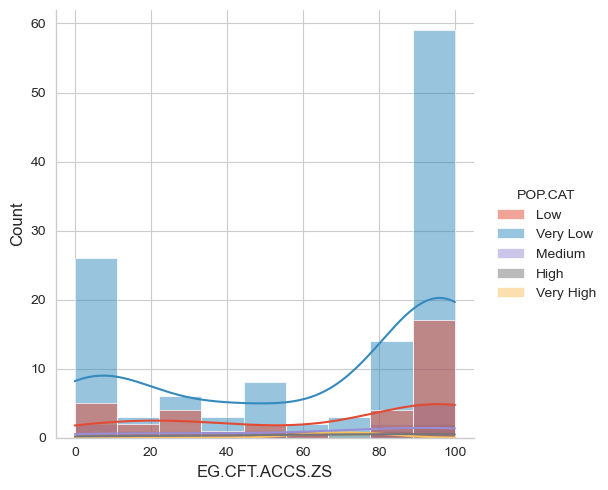

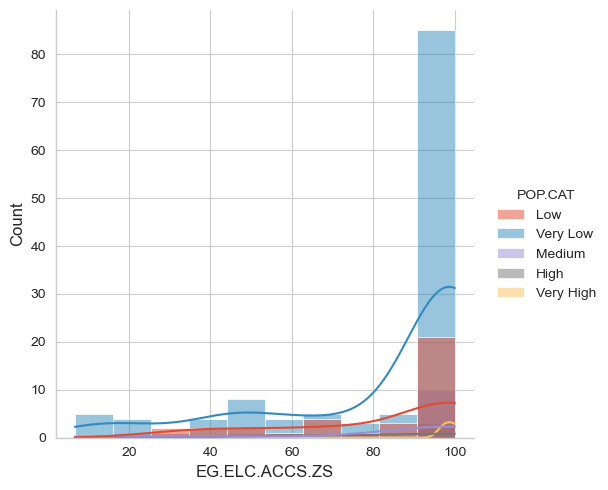

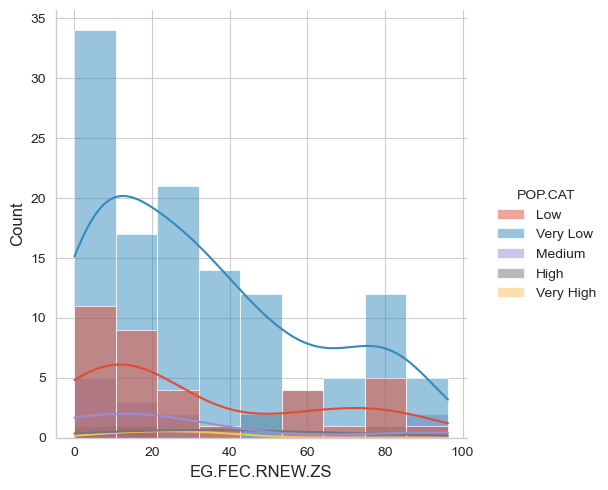

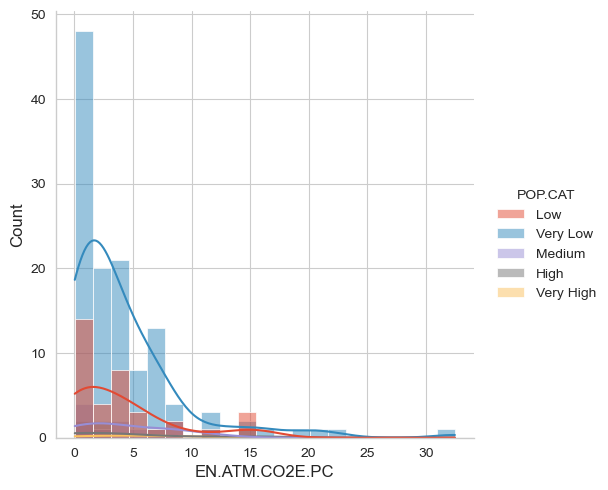

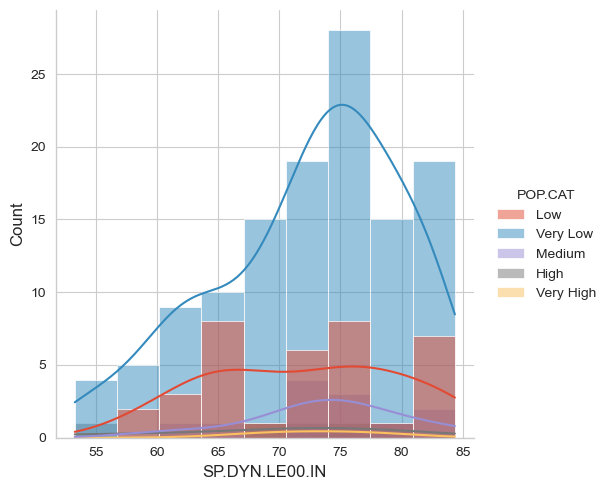

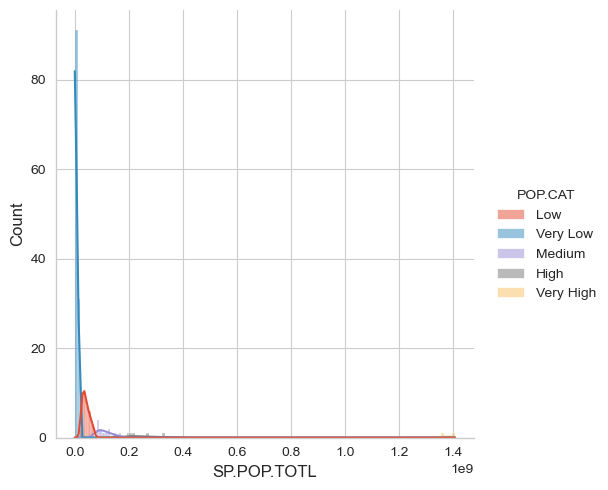

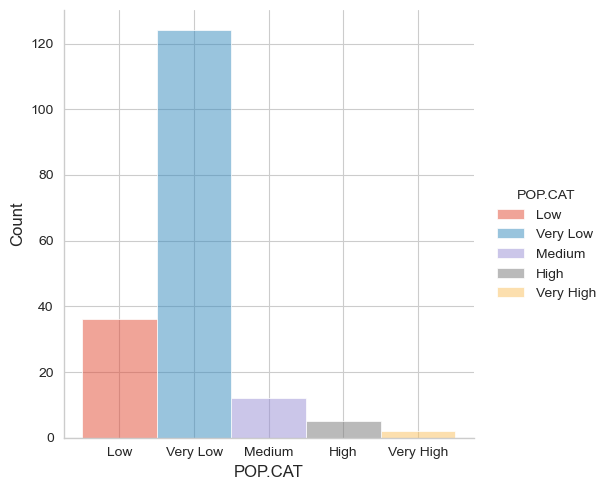

In [50]:
# Set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

for col in df.columns[2:]:
    
    sns.displot(data=df, kind='hist', x=col, hue='POP.CAT',kde=True, alpha=0.5)
    plt.show()

In [45]:
df.columns[2:-1]

Index(['EG.CFT.ACCS.ZS', 'EG.ELC.ACCS.ZS', 'EG.FEC.RNEW.ZS', 'EN.ATM.CO2E.PC',
       'SP.DYN.LE00.IN', 'SP.POP.TOTL'],
      dtype='object')

In [46]:
from itertools import combinations

# Get all the combinations of the columns
combos = list(combinations(df.columns[2:-2], 2))

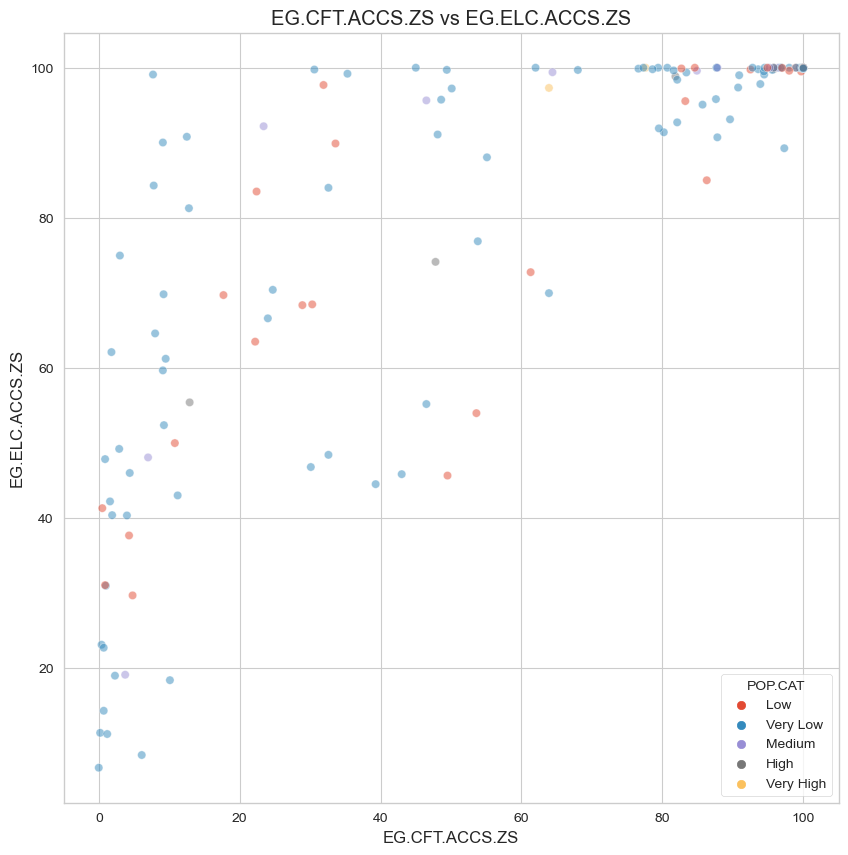

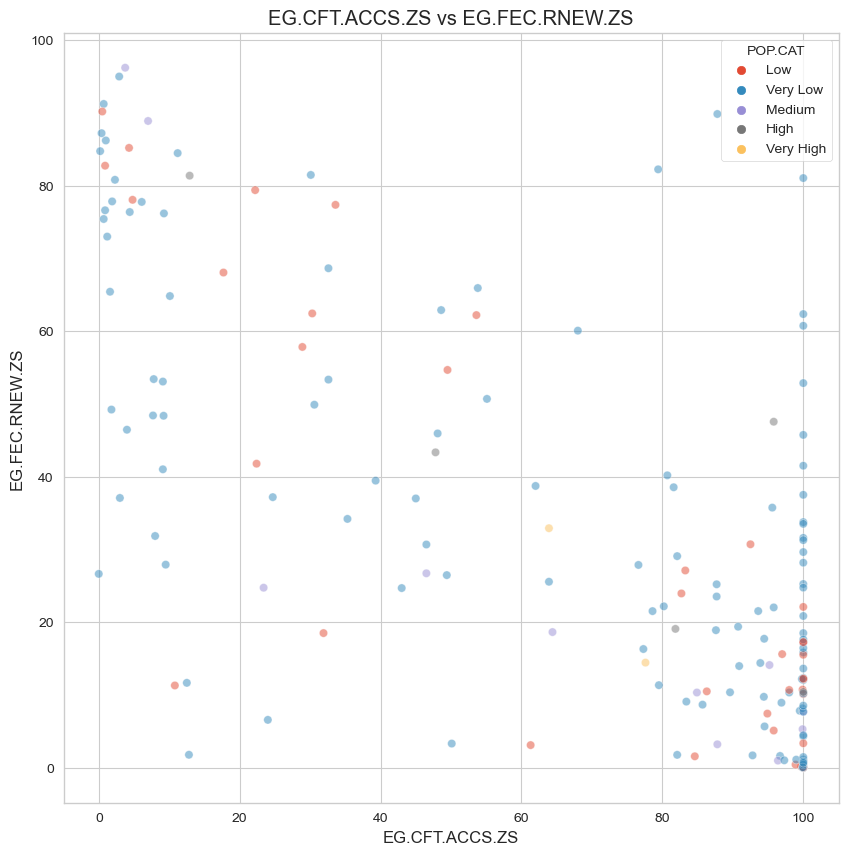

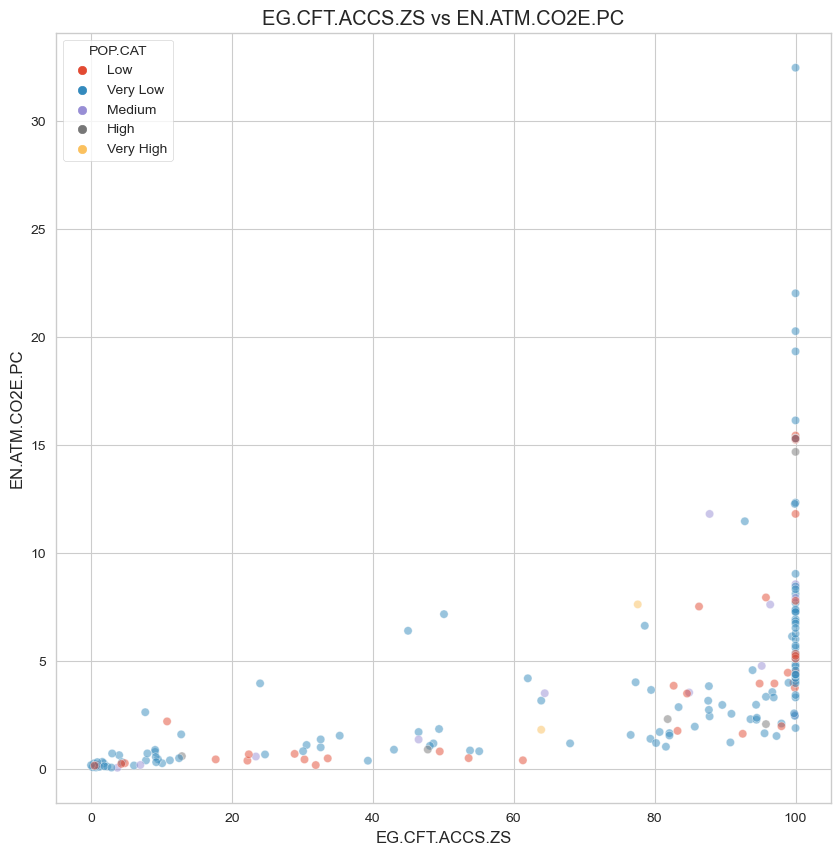

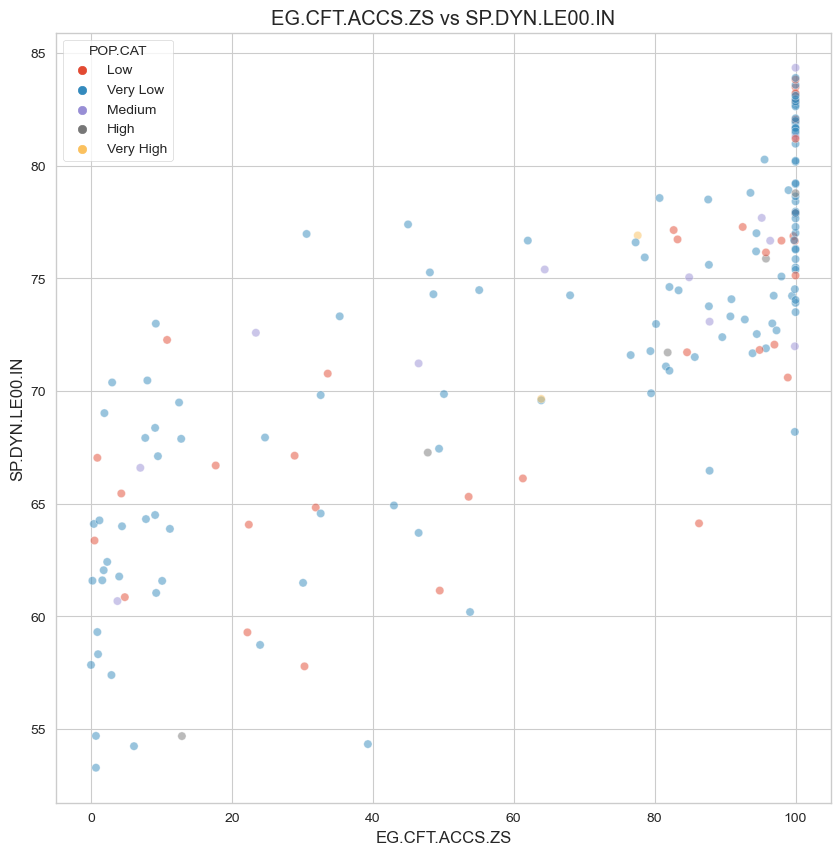

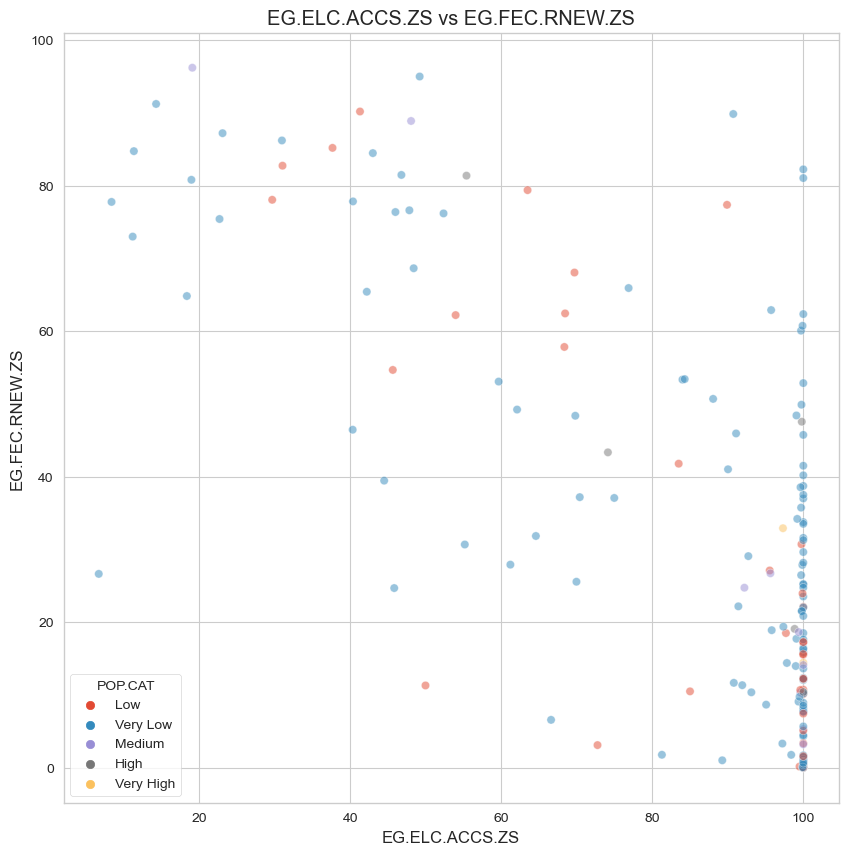

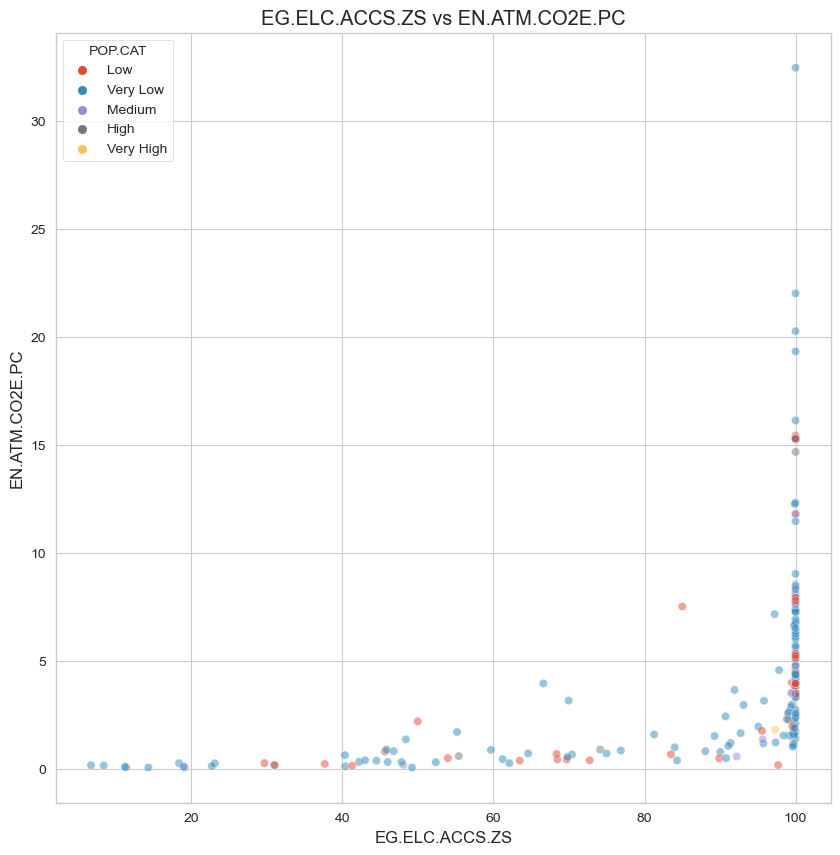

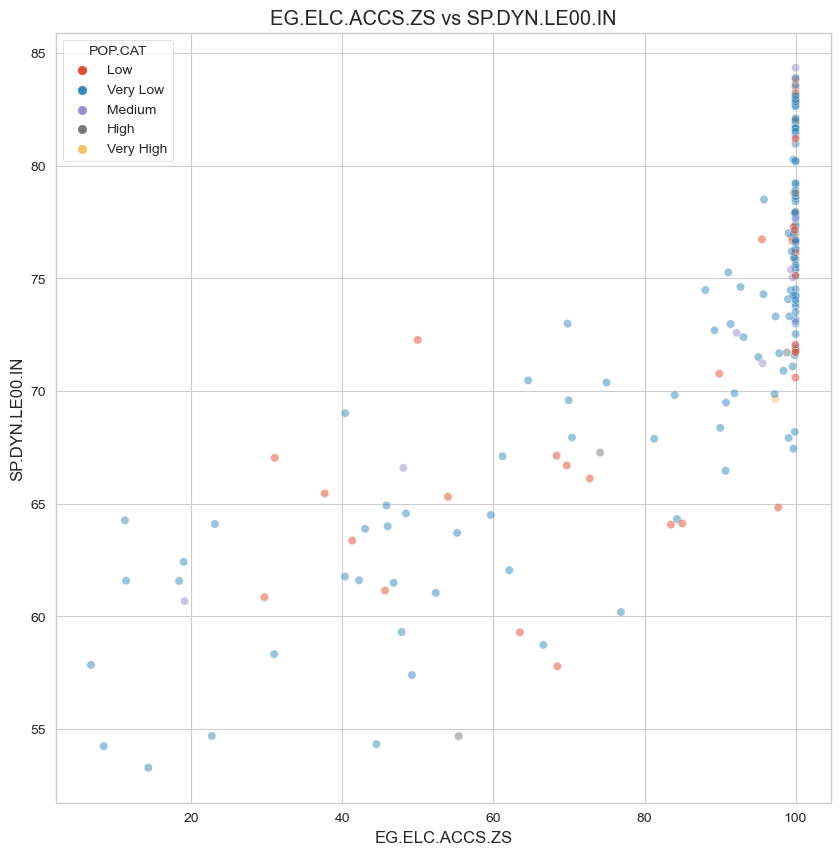

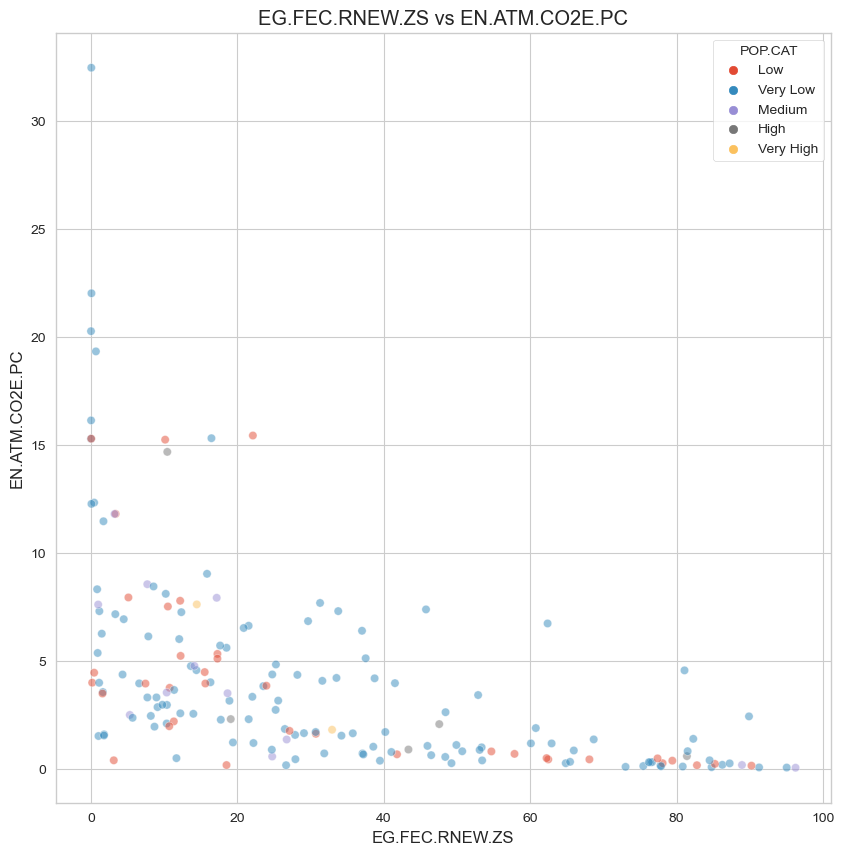

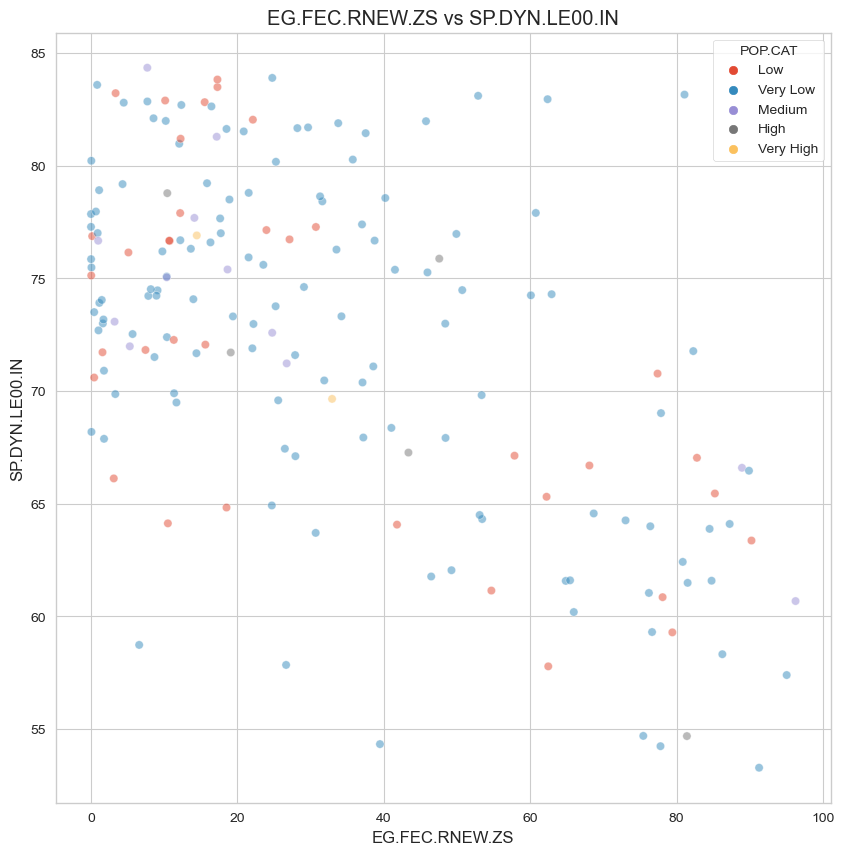

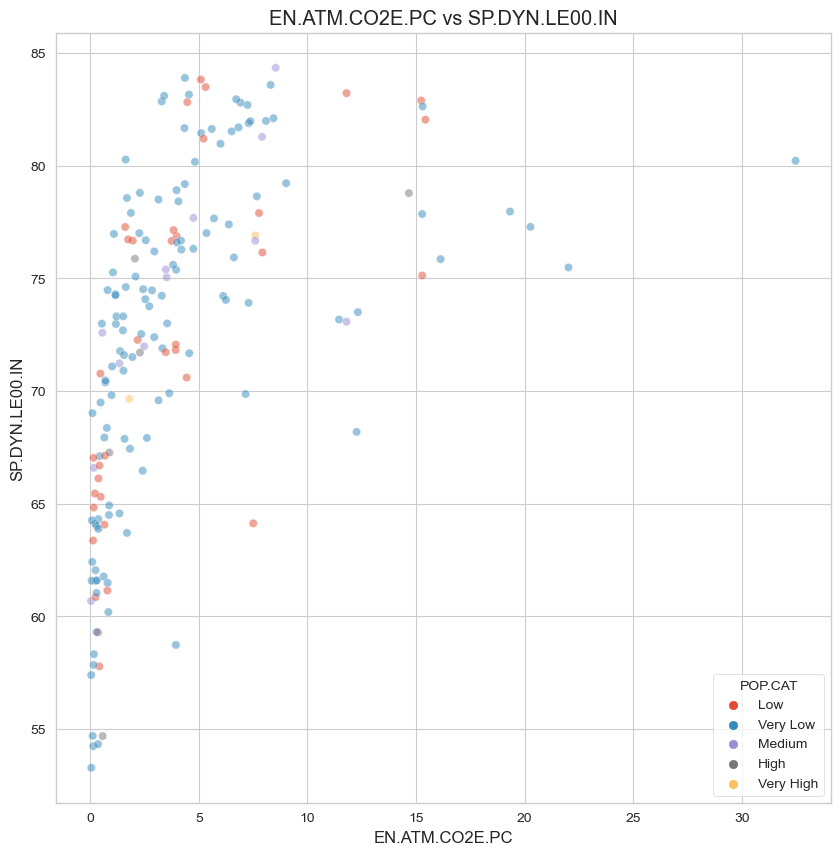

In [51]:
for combo in combos:
    
    # Plot the data
    sns.scatterplot(data=df, x=combo[0], y=combo[1], hue='POP.CAT',alpha=0.5)

    # Set the title
    plt.title(f'{combo[0]} vs {combo[1]}')

    plt.show()

In [46]:
df.columns[2:-1]

Index(['EG.CFT.ACCS.ZS', 'EG.ELC.ACCS.ZS', 'EG.FEC.RNEW.ZS', 'EN.ATM.CO2E.PC',
       'SP.DYN.LE00.IN', 'SP.POP.TOTL'],
      dtype='object')

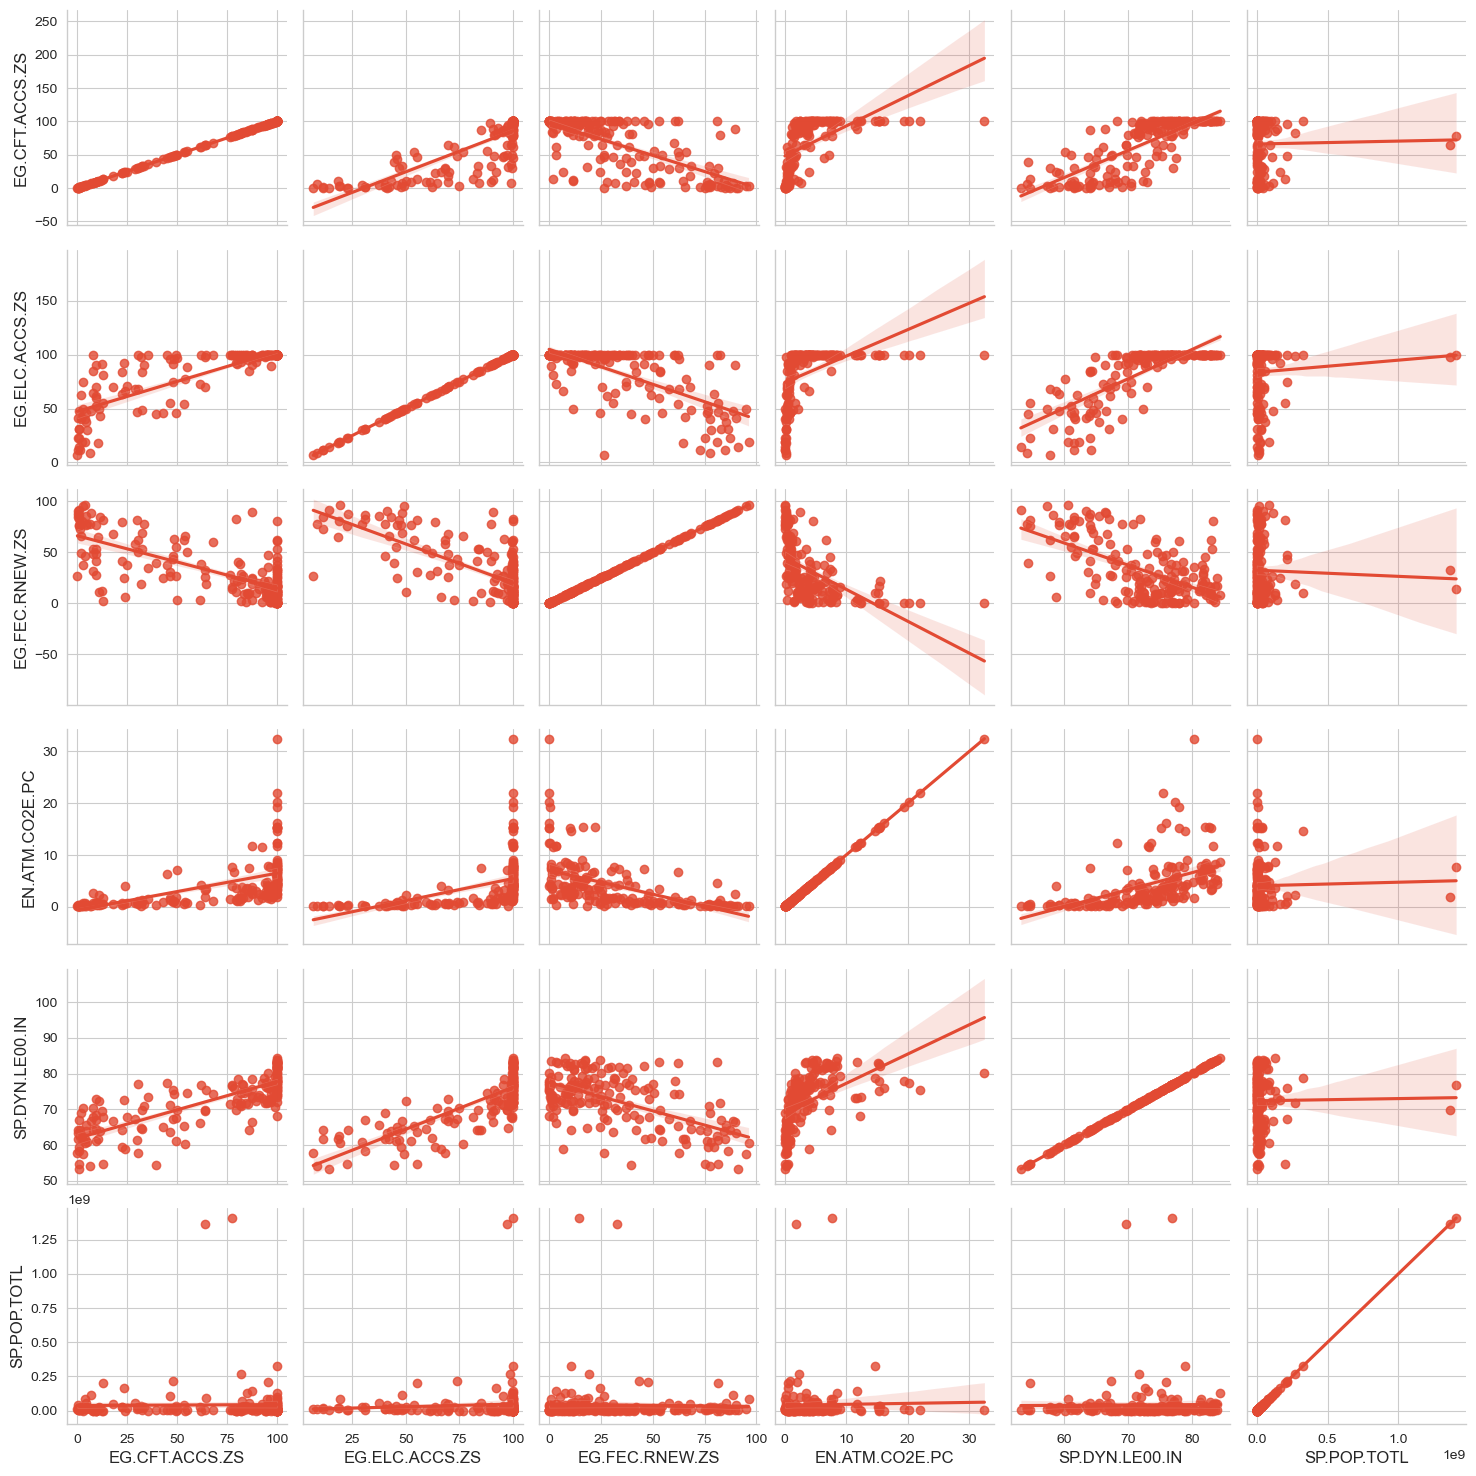

In [62]:
sns.pairplot(data=df, kind='reg', vars=df.columns[2:-1] ,diag_kind=None)
plt.show()

In [ ]:
g = sns.PairGrid(df)

g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)

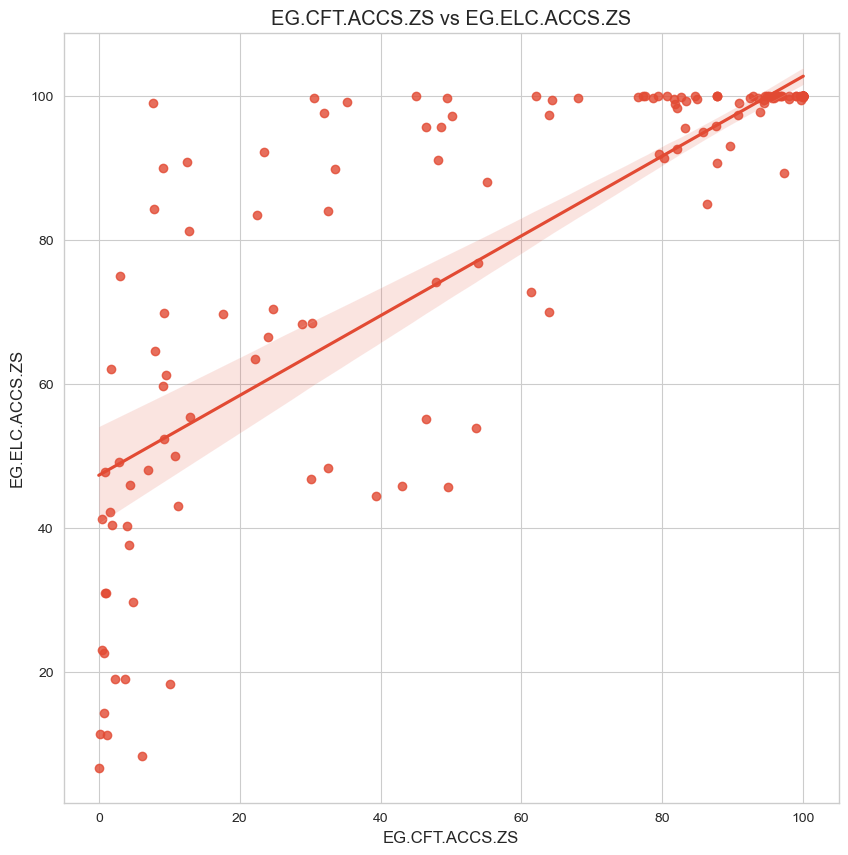

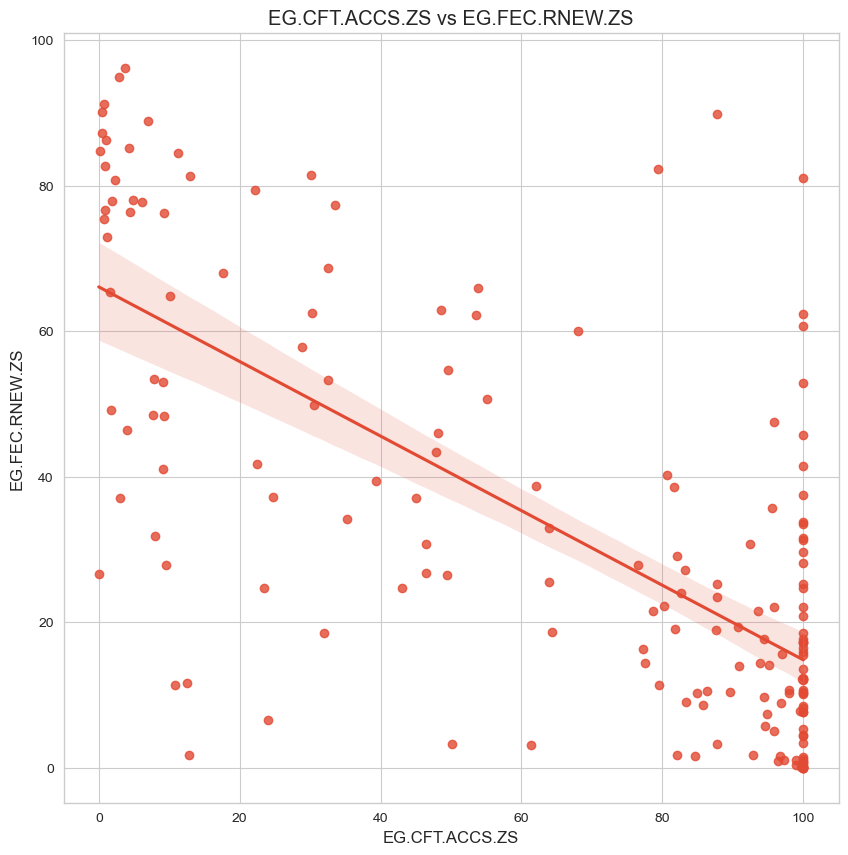

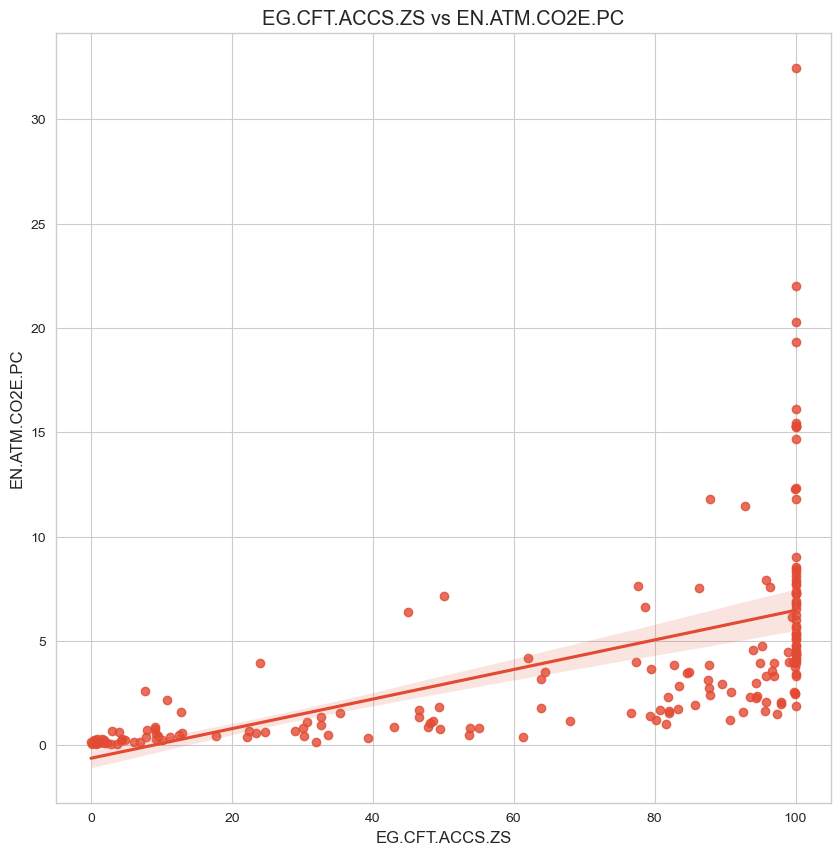

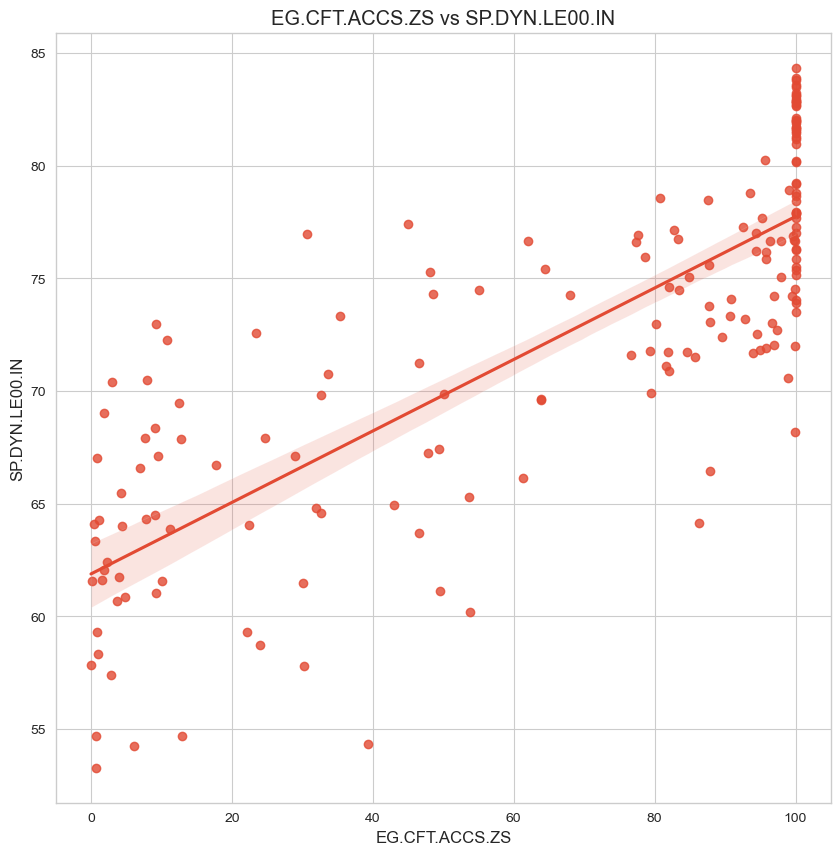

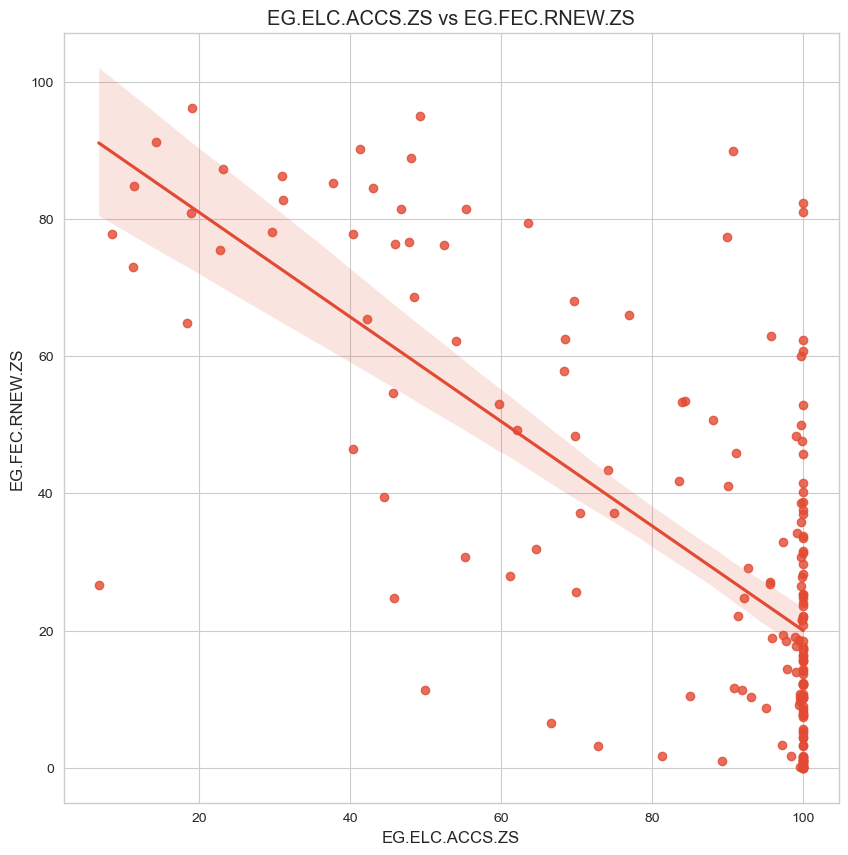

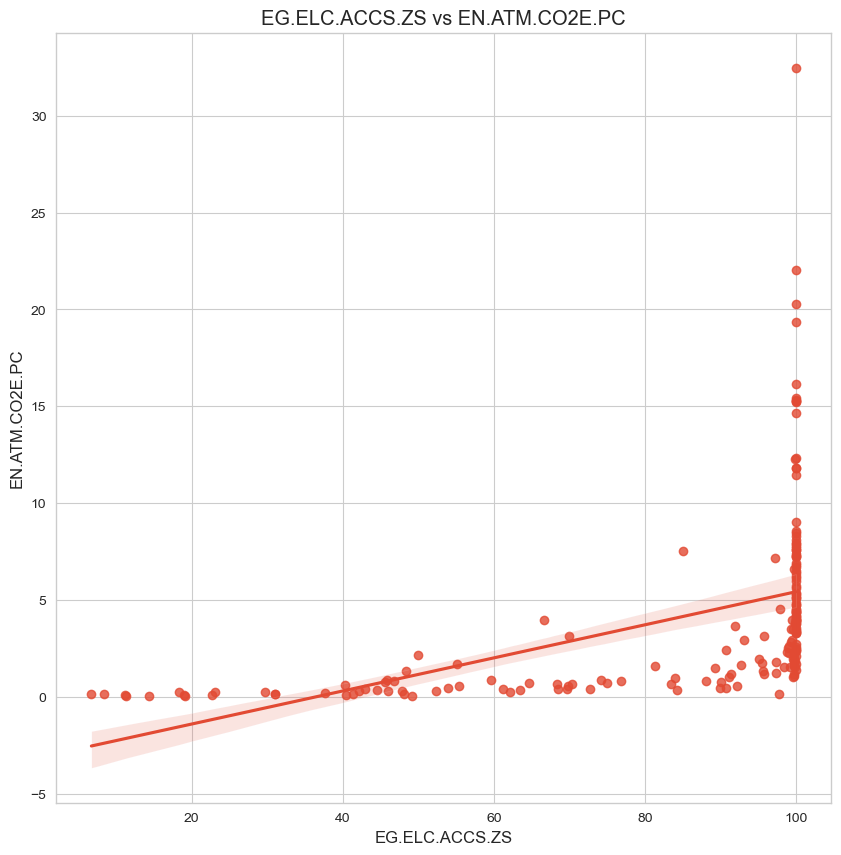

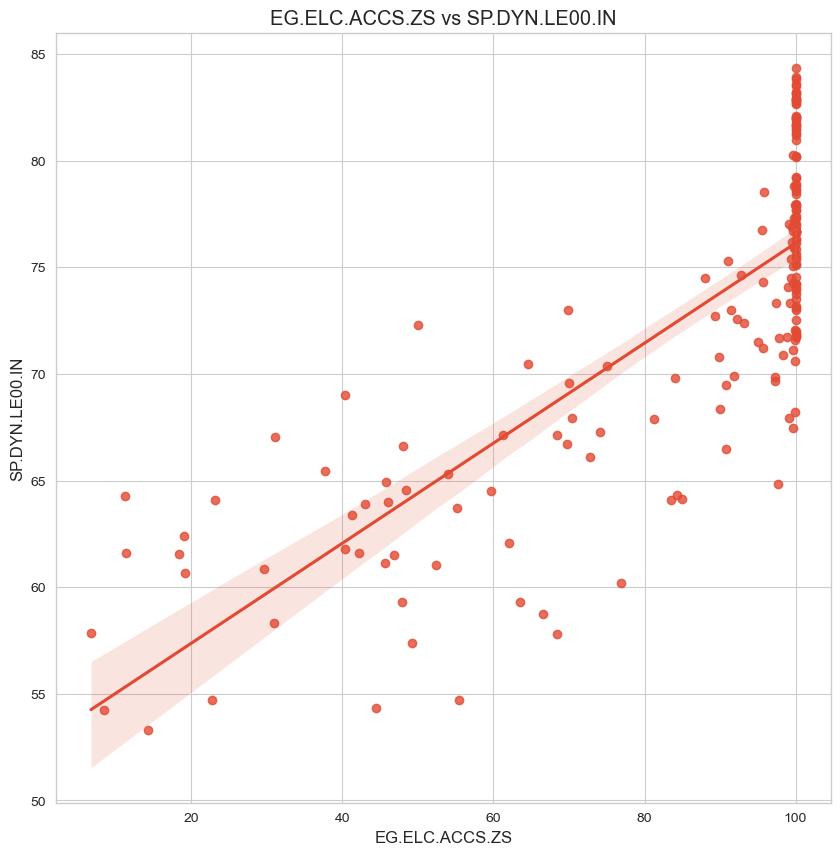

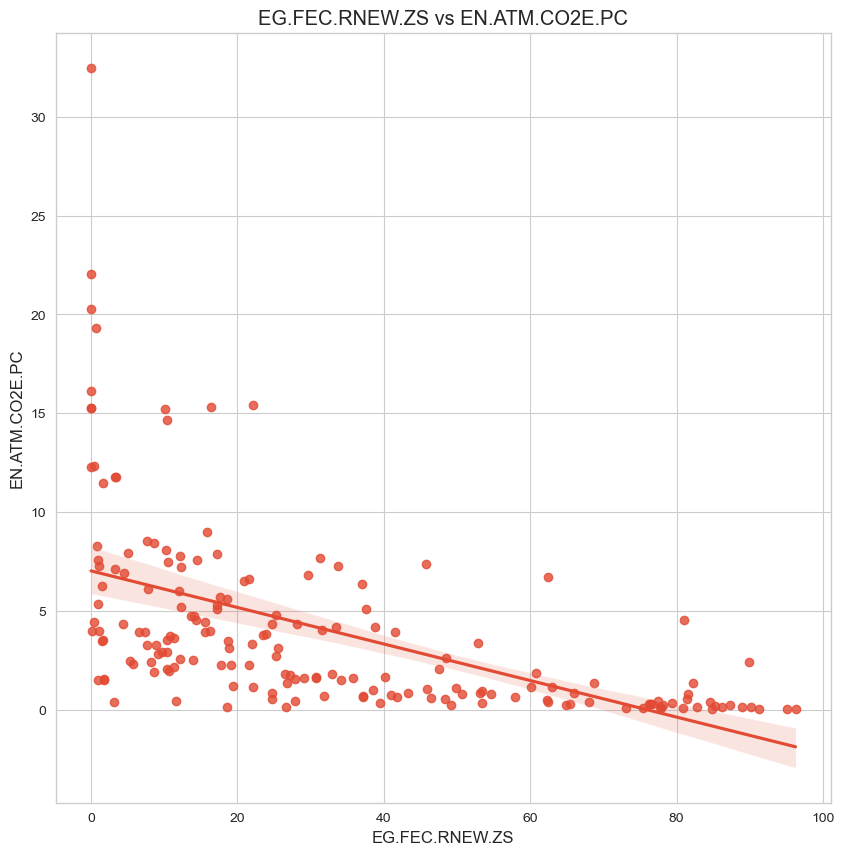

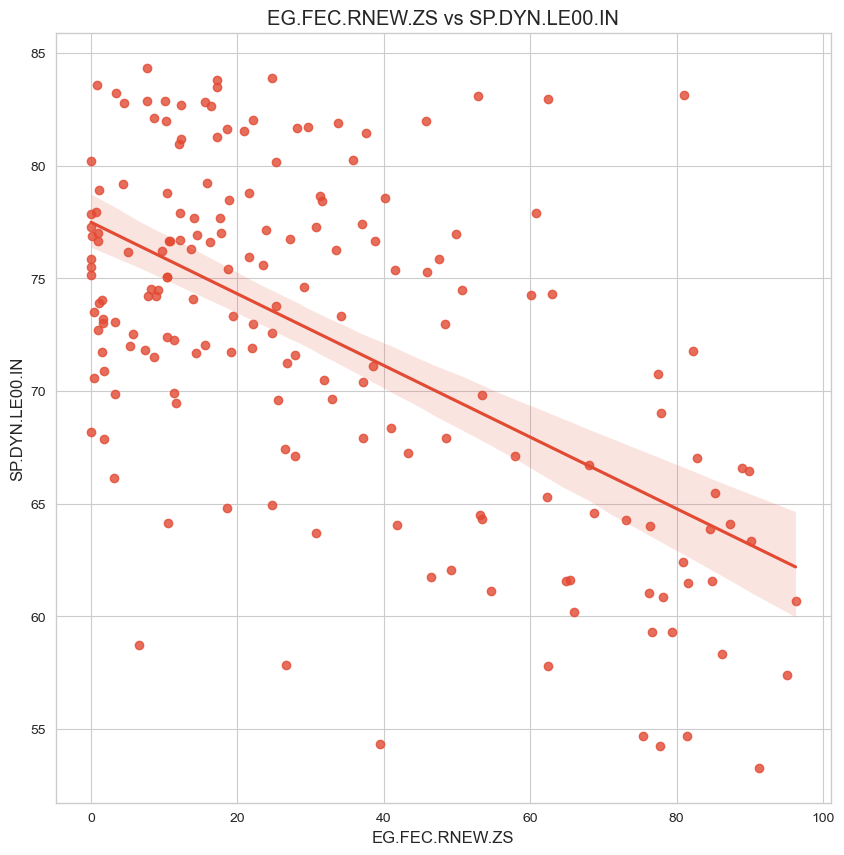

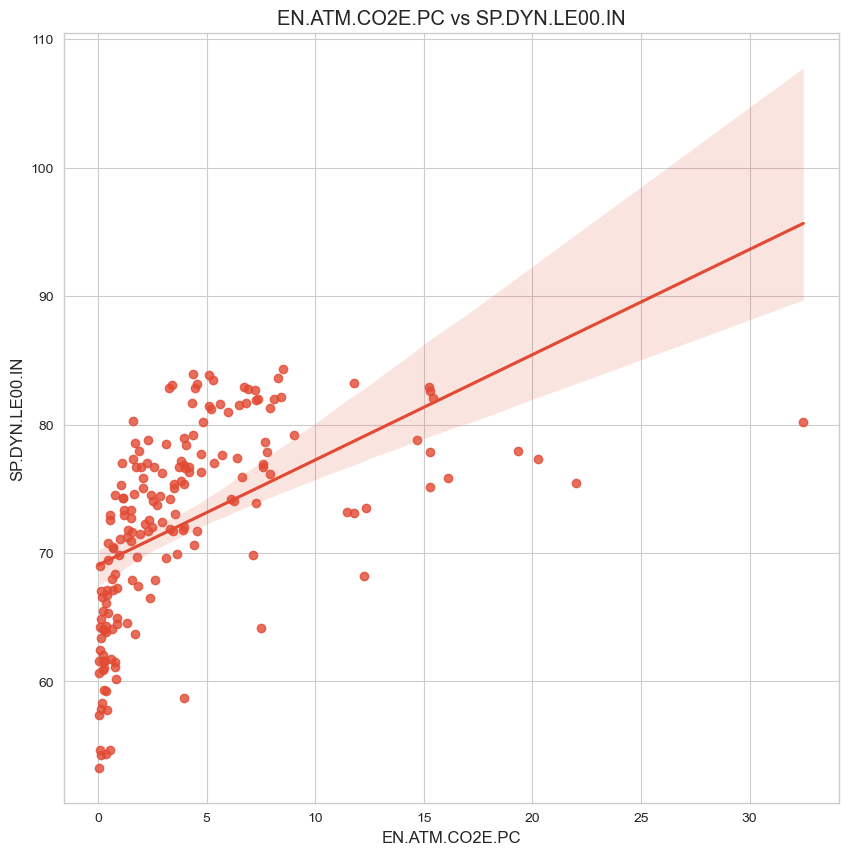

In [54]:
for combo in combos:
    
    # Plot the data
    sns.regplot(data=df, x=combo[0], y=combo[1])

    # Set the title
    plt.title(f'{combo[0]} vs {combo[1]}')

    plt.show()

In [70]:
import statsmodels.api as sm

# Get the data

y = df['EG.FEC.RNEW.ZS']

x = df['SP.DYN.LE00.IN']

# Add a constant to the independent variable
x = sm.add_constant(x)

# fit the model

model = sm.OLS(y, x).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         EG.FEC.RNEW.ZS   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     93.48
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           5.08e-18
Time:                        14:10:50   Log-Likelihood:                -810.70
No. Observations:                 179   AIC:                             1625.
Df Residuals:                     177   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            189.5469     16.362     11.

In [71]:
import statsmodels.api as sm

# Get the data

y = df['EG.ELC.ACCS.ZS']

x = df['SP.DYN.LE00.IN']

# Add a constant to the independent variable
x = sm.add_constant(x)

# fit the model

model = sm.OLS(y, x).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         EG.ELC.ACCS.ZS   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           6.37e-41
Time:                        14:10:52   Log-Likelihood:                -742.99
No. Observations:                 179   AIC:                             1490.
Df Residuals:                     177   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -112.9833     11.209    -10.

In [88]:
model.f_test([1,2])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=97.29524934247375, p=1.450143257503784e-18, df_denom=177, df_num=1>

In [72]:
model.resid

0      34.240255
1      -0.853165
2       3.254336
3      -7.785490
4       3.384212
         ...    
174    16.837899
175     7.182159
176     5.775154
177   -17.882481
178    -7.580290
Length: 179, dtype: float64

In [73]:
vals = df['SP.DYN.LE00.IN'].values
resids = model.resid.values

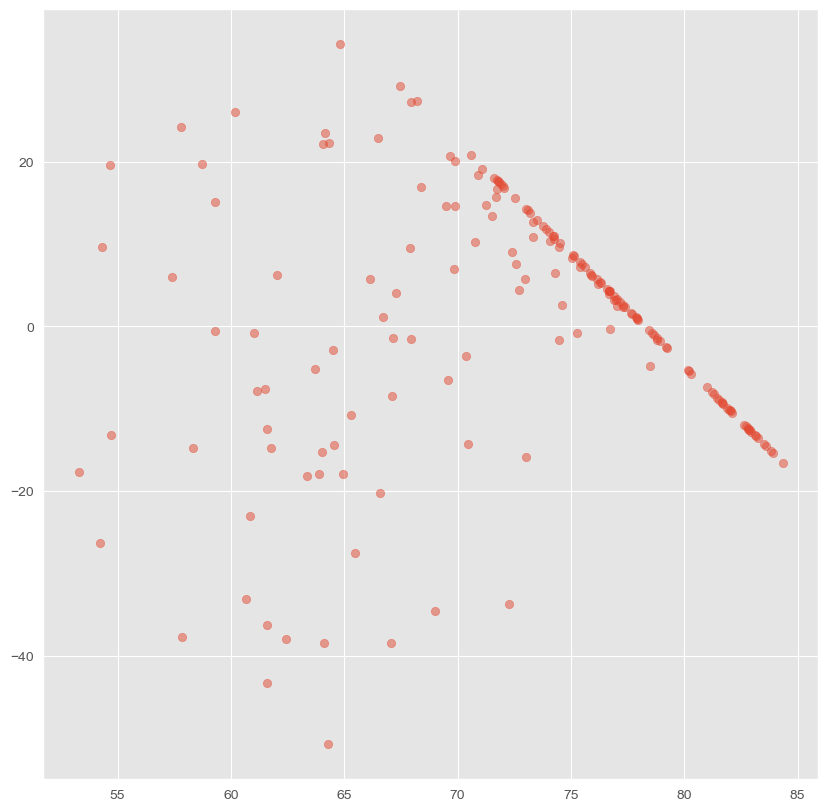

In [74]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('ggplot')

# Set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Plot the data
plt.scatter(vals, resids, alpha=0.5)

Text(0, 0.5, 'Access to Electricity')

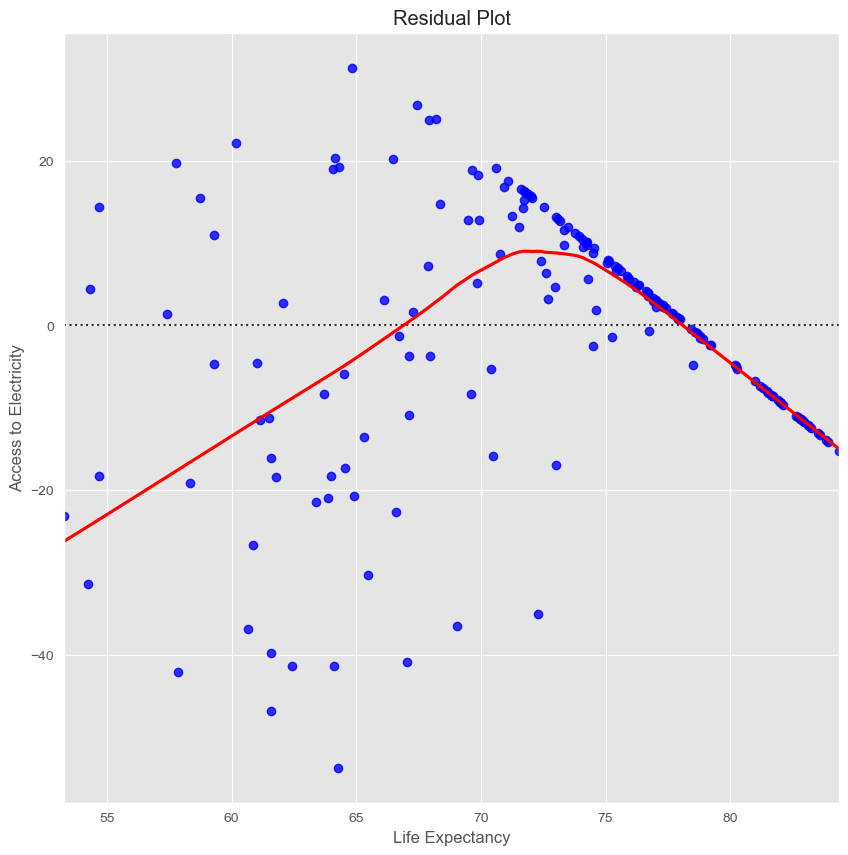

In [77]:
# Set the figure size
# Set the style
plt.rcParams['figure.figsize'] = [10, 10]
plt.style.use('ggplot')

sns.residplot(data=df, x='SP.DYN.LE00.IN', y='EG.ELC.ACCS.ZS', lowess=True, robust=True, scatter_kws={'color':'blue'} ,line_kws={'color': 'red'})

# Set the title
plt.title('Residual Plot')

# Set the x-axis label
plt.xlabel('Life Expectancy')

# Set the y-axis label
plt.ylabel('Access to Electricity')